### Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
### Read the DataSet
df = pd.read_csv('1.height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
### Dependent and independent file
x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [5]:
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [6]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

Text(0.5, 1.0, 'Weight-Height Relationship')

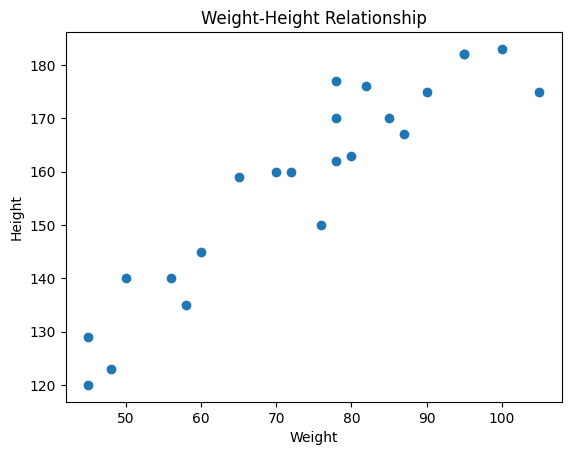

In [7]:
### Visualize the data
plt.scatter(x, y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight-Height Relationship")

In [8]:
### Train - Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
### Standardization the independent data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
### Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
print("The slope or coefficient of weight is: ", regressor.coef_)
print("The Intercept is: ", regressor.intercept_)

The slope or coefficient of weight is:  [17.03440872]
The Intercept is:  157.5


In [13]:
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

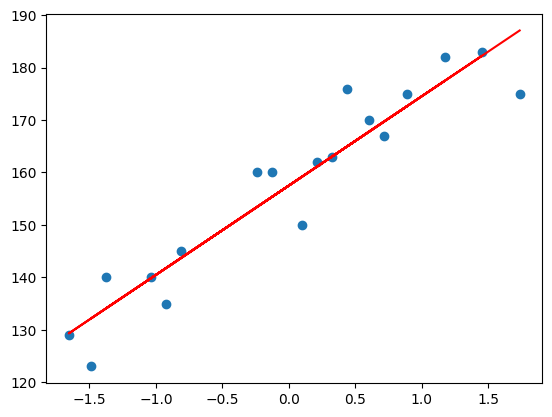

In [14]:
### Visualize the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, c='red')

In [15]:
### permorance metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

score = r2_score(y_test, y_test_pred)

### Adjusted R2 Score
n = len(y_test)
k = x_test.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  109.77592599051664
The mean absolute error is:  9.822657814519232
The mean root mean error is:  10.477400726827081
The r2 score is:  0.776986986042344
The adjusted r2 score is:  0.7026493147231252


In [16]:
### Predict for new data
weight = 80
scaled_weight = scaler.transform([[weight]])
print(f"The Height prediction for Weight {weight}kg is {round(regressor.predict(scaled_weight)[0], 2)}cm.")

The Height prediction for Weight 80kg is 163.01cm.


### Assumptions

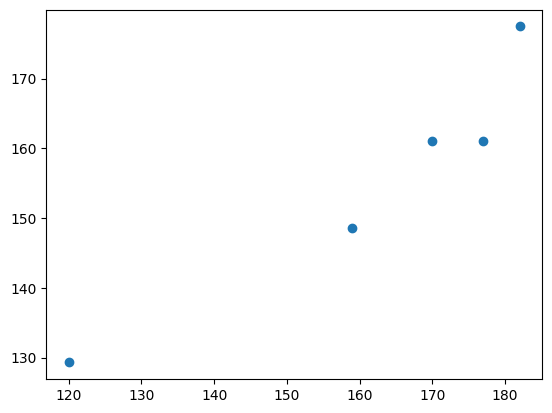

In [17]:
### 1. Plot the scatter plot for the predictions
plt.scatter(y_test, y_test_pred)

In [18]:
### Since, it is linearly distributed i.e. our model is performance is very good

In [19]:
### 2. Residuals - difference between the actual point and the predicted point
residuals = y_test - y_test_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

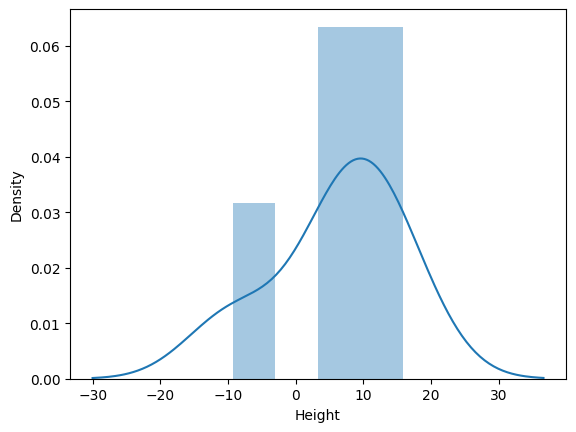

In [21]:
### Plot the residuals
sns.distplot(residuals, kde=True)

In [ ]:
### Here our residuals follows the normal distribution with some left skewed 
### so our model is a better model altogether

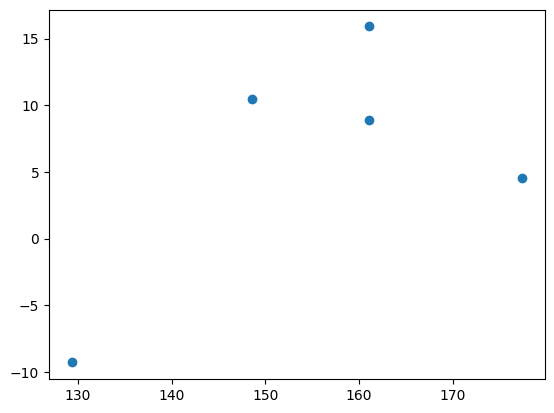

In [ ]:
### Residuals w.r.to the predicted test output
plt.scatter(y_test_pred, residuals)

In [25]:
### Here it is uniformly distributed so with respect to this also my model is a good model